# Optimisation en Python

L'optimisation mathématique est un domaine complexe. Wikipedia défini le domaine comme

> L'optimisation est une branche des mathématiques cherchant à modéliser, à analyser et à résoudre analytiquement ou numériquement les problèmes qui consistent à minimiser ou maximiser une fonction sur un ensemble.

Beaucoup de problèmes se réduisent en fait à un problème d'optimisation :

- Ajuster une courbe de tendance revient à minimiser la distance, l'écart entre les points mesurés et le résultat d'une fonction, en en ajustant certains paramètres.
- Résoudre un système d'équation non-linéaire consistera à annuler des résidus (et donc à priori, les minimiser) en faisant varier les inconnus.
- Plus classiquement, on peut vouloir juste minimiser / maximiser une ou plusieurs métriques pour trouver une plage de fonctionnement idéal d'un système modélisé : trouver le meilleur rendement, minimiser un coût économique...

## La descente de gradient

Une grande famille de méthodes d'optimisation se fondent sur la descente du gradient, qui, partant d'une condition initiale suivra le sens de la pente de la fonction en en calculant son gradient local.

![image.png](../../images/grad_descente.png)
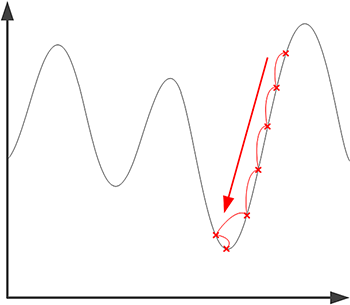

Cette méthode et ses dérivés ont deux défauts majeurs :

- elles ne permettent pas de garantir que c'est un minimum *global* qui sera trouvé mais un minimum *local*.
- elles sont tributaires du choix de la condition initiale.

![image.png](../../images/min_local_global.png)
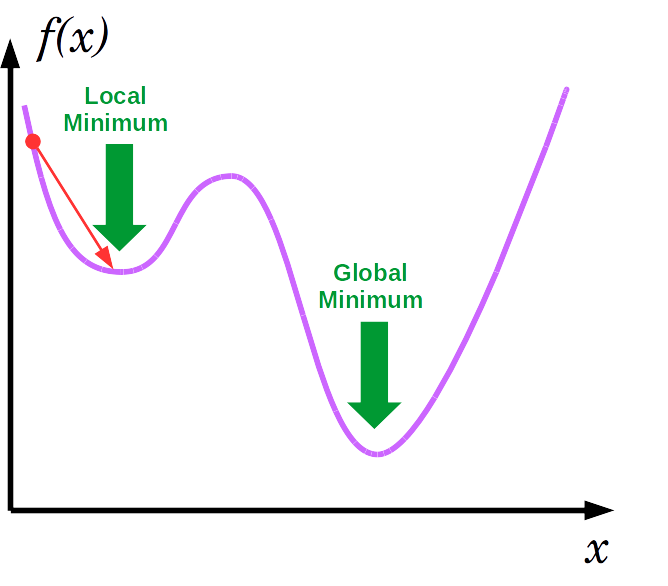

Elles sont toutefois simple à mettre en oeuvre et assez robustes. Elles sont disponibles dans `scipy.optimize`. Nous allons essayer de trouver le minimum d'une fonction tests contenant 4 minima locaux (dont un minimum global, la fonction Styblinski–Tang:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def styblinski_tang_func(x):
    x1 = x[0]
    x2 = x[1]
    return (x1**4 - 16 * x1**2 + 5 * x1) / 2 + (x2**4 - 16 * x2**2 + 5 * x2) / 2

In [3]:
x1 = np.linspace(-4, 4, 500)
x2 = np.linspace(-4, 4, 500)
xx1, xx2 = np.meshgrid(x1, x2, indexing="ij")
z = styblinski_tang_func([xx1, xx2])

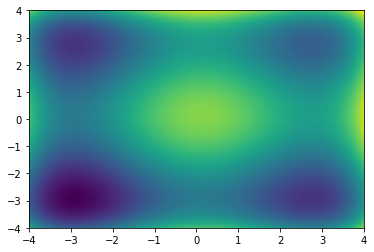

In [5]:
plt.pcolormesh(x1, x2, z)

In [6]:
from scipy.optimize import minimize

In [7]:
result = minimize(styblinski_tang_func, x0=[0, 0])
result

      fun: -78.33233140754282
 hess_inv: array([[ 0.51447111, -0.48552889],
       [-0.48552889,  0.51447111]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([-2.90353403, -2.90353403])

La fonction renvoie un objet "complexe", avec entre autres attributs

- fun: la valeur du minimum trouvé
- success: indiquant si un minimum a été trouvé
- x: les arguments de la fonction correspondant au minimum trouvé

Il est possible de choisir un nombre important de méthodes d'optimisation, certaines acceptant des contraintes comme des relations ou des bornes pour les paramètres.

### Exercice: affichez le minimum trouvé en fonction du x0 choisi.

## Des alternatives à la descente du gradient

Plusieurs alternatives existent. Parmi les plus connus, on peut mettre en avant les algorithmes génétiques et les Particle Swarm Optimization.

Les deux sont disponibles dans la librairie DEAP. Celle ci est un peu complexe à prendre en main mais très puissante.

La seconde (PSO) est assez simple à implémenté, et on la trouve dans plusieurs librairies Python comme https://pyswarms.readthedocs.io/en/latest/

Elle consiste en un essaim de particules qui vont essayer de trouver un minimum en suivant le sens de la pente mais aussi en communiquant avec les autres particules de l'essaim.

![](../../images/ParticleSwarmArrowsAnimation.gif)

In [10]:
import pyswarms as ps

    options : dict with keys :code:`{'c1', 'c2', 'w'}`
        a dictionary containing the parameters for the specific
        optimization technique.
            * c1 : float
                cognitive parameter
            * c2 : float
                social parameter
            * w : float
                inertia parameter

In [11]:
def wrap_func(x):
    return styblinski_tang_func(x.T)

In [12]:
max_bound = 5.12 * np.ones(2)
min_bound = - max_bound
bounds = (min_bound, max_bound)
bounds

(array([-5.12, -5.12]), array([5.12, 5.12]))

In [16]:
low = np.array([-5, -5])
high = np.array([5, 5])
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=(low, high))
optimizer.optimize(wrap_func, iters=100)

2020-03-01 16:04:45,456 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-78.3
2020-03-01 16:04:45,563 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -78.3323009859715, best pos: [-2.90477097 -2.90305579]


(-78.3323009859715, array([-2.90477097, -2.90305579]))

### Exercice : essayez de trouver le minimum global d'une fonction plus complexe

$$f(x,y) = - \left(y+47\right) \sin \sqrt{\left|\frac{x}{2}+\left(y+47\right)\right|} - x \sin \sqrt{\left|x - \left(y + 47 \right)\right|}$$